In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
#import libraries

In [128]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [129]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [130]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [131]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [132]:
train['Embarked'].fillna('S',inplace=True)

In [133]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [134]:
print("Average Age:", round(data['Age'].mean(),2))

Average Age: 29.7


In [135]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [136]:
gen_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(), size=177)


In [137]:
train['Age'][np.isnan(train['Age'])]=gen_age

C:\Users\Keerthana\AppData\Local\Temp\ipykernel_21156\283863123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][np.isnan(train['Age'])]=gen_age


In [138]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [139]:
gen_age1=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(), size=86)


In [140]:
test['Age'][np.isnan(test['Age'])]=gen_age1

C:\Users\Keerthana\AppData\Local\Temp\ipykernel_21156\2126762493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][np.isnan(test['Age'])]=gen_age1


In [141]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [142]:
train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [143]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [144]:
train[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


<Axes: xlabel='Age', ylabel='Count'>

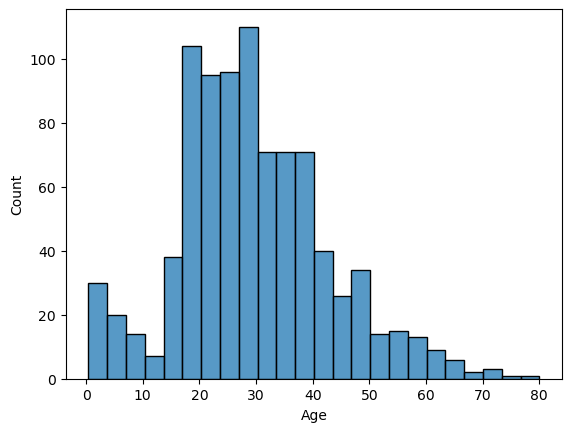

In [145]:
sns.histplot(train['Age'])

<Axes: >

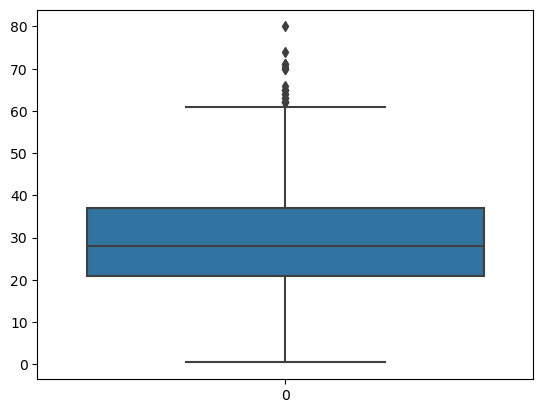

In [146]:
sns.boxplot(train['Age'])

In [147]:
train[train['Age']>75]['Survived'].value_counts()

1    1
Name: Survived, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

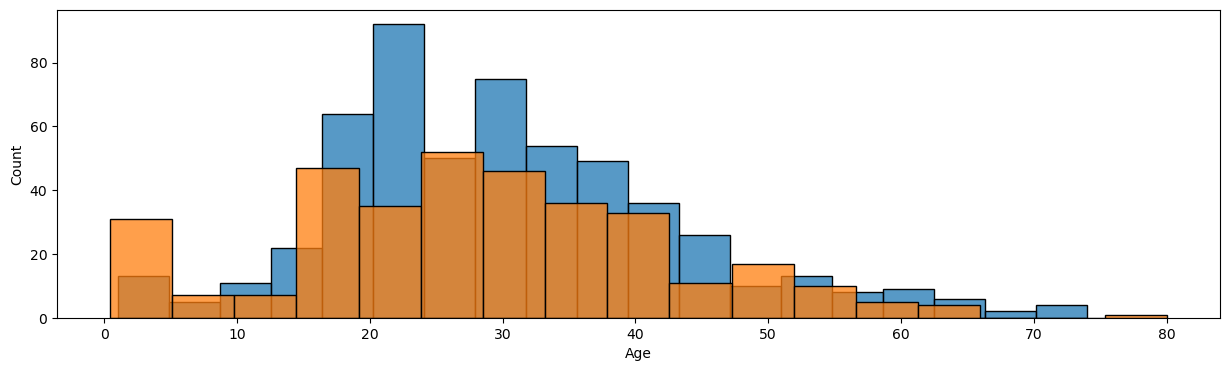

In [148]:
plt.subplots(figsize=(15,4))
sns.histplot(train[train['Survived']==0]['Age'])
sns.histplot(train[train['Survived']==1]['Age'])

In [149]:
passengerId=test['PassengerId'].values

In [150]:
train.drop(columns=['PassengerId','Ticket'],inplace=True)
test.drop(columns=['PassengerId','Ticket'],inplace=True)

In [151]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<Axes: xlabel='Fare', ylabel='Count'>

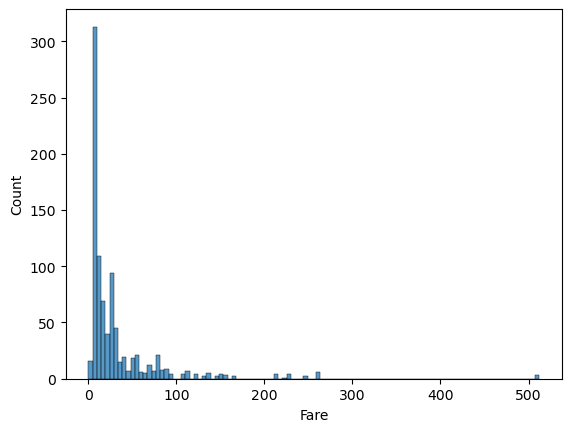

In [152]:
sns.histplot(train['Fare'])

<Axes: >

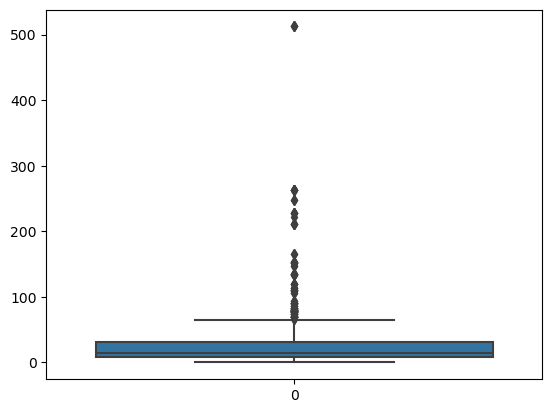

In [153]:
sns.boxplot(train['Fare'])

In [154]:
train[train['Fare']>400]['Survived'].value_counts()

1    3
Name: Survived, dtype: int64

<Axes: xlabel='Fare', ylabel='Count'>

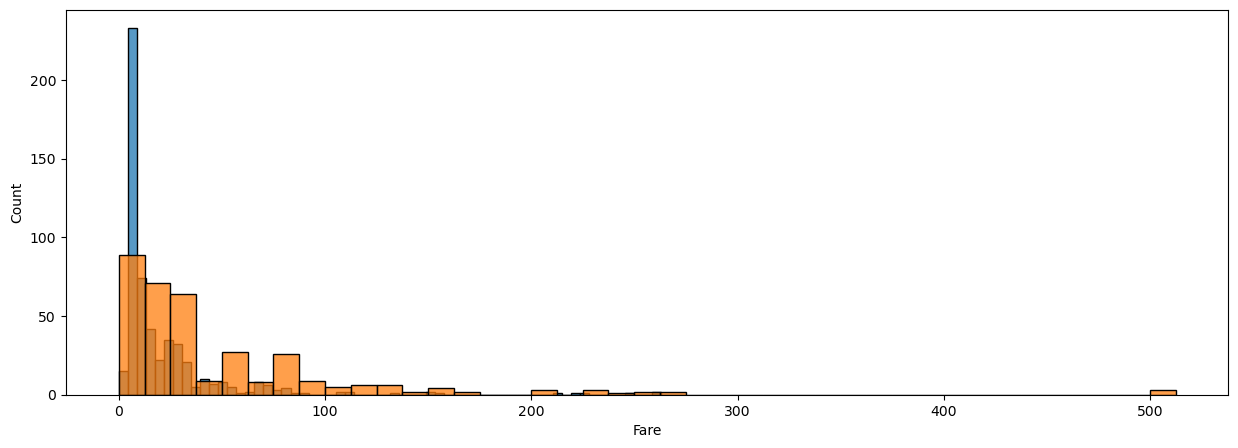

In [155]:
plt.subplots(figsize=(15,5))
sns.histplot(train[train['Survived']==0]['Fare'])
sns.histplot(train[train['Survived']==1]['Fare'])

In [156]:
# Don't delete this unless its 1st Jan
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [157]:
train.drop(columns=['Name'],inplace=True)
test.drop(columns=['Name'],inplace=True)

In [158]:
train['family']=train['SibSp'] + train['Parch'] + 1
test['family']=test['SibSp'] + test['Parch'] + 1

In [159]:
train.drop(columns=['SibSp','Parch'],inplace=True)
test.drop(columns=['SibSp','Parch'],inplace=True)

In [160]:
train['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

In [161]:
train[['family','Survived']].groupby('family').mean()

,Survived
family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [162]:
def family_size(number):
    if number==1:
        return "Alone"
    elif number>1 and number <5:
        return "Small"
    else:
        return "Large"

In [163]:
family_size(5)

'Large'

In [164]:
train['family_size']=train['family'].apply(family_size)

In [165]:
test['family_size']=test['family'].apply(family_size)


In [166]:
train.drop(columns=['family'],inplace=True)
test.drop(columns=['family'],inplace=True)

In [167]:
y=train['Survived'].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [168]:
train.drop(columns=['Survived'],inplace=True)

In [169]:
print(train.shape)
print(test.shape)

(891, 6)
(418, 6)


In [170]:
final=train.append(test)

C:\Users\Keerthana\AppData\Local\Temp\ipykernel_21156\2182374563.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final=train.append(test)


In [171]:

final.shape

(1309, 6)

In [172]:
final=pd.get_dummies(final, columns=['Pclass','Sex','Embarked','family_size'], drop_first=True)


In [173]:
Xf=final.tail(418).values

In [174]:
X=final.head(891).values

In [175]:
X.shape

(891, 9)

In [176]:
y.shape

(891,)

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [178]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [179]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [180]:
y_pred=clf.predict(X_test)


In [181]:
y_test.shape

(179,)

In [182]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7597765363128491

In [183]:
yf=clf.predict(Xf)

In [184]:
yf.shape

(418,)

In [185]:
submission=pd.DataFrame()

In [186]:
submission['PassengerId']=passengerId
submission['Survived']=yf

In [188]:
submission.to_csv('submission.csv', index=False)

In [190]:
sub=pd.read_csv("submission.csv")

In [195]:
sub.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
